In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

In [2]:
DEVICE = 'cuda:0'

In [3]:
# A toy model with a diffuse and point source component

NN = 18

def model(z, sigma = .1, n_marg = NN):
    #z_marg = np.random.rand(n_marg)
    #z = np.hstack([z, z_marg])
    z = z * np.pi
    x = np.sin(z)**2
    return x

In [4]:
def noisemodel(x, z, sigma = 0.1):
    x = x + np.random.randn(*x.shape) * sigma
    return x

In [5]:
z0 = np.ones(20) * 0.25
zdim = len(z0)
x0 = model(z0)
print(x0, zdim)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5] 20


In [6]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


In [7]:
MAX_EPOCHS = 100
EXPECTED_N = 20000

In [8]:
intensity = None

for _ in range(2):
    if intensity is None:
        intensity = swyft.get_unit_intensity(expected_n=EXPECTED_N, dim=zdim)
    else:
        intensity = swyft.get_constrained_intensity(
            expected_n=EXPECTED_N,
            ratio_estimator=re,
            x0=x0,
            threshold=1e-4,
            #factor_mask=intensity.factor_mask,
        )
    cache.grow(intensity)
    cache.simulate(model)
    points = swyft.Points(cache, intensity, noisemodel)
    re = swyft.RatioEstimator(points, device=DEVICE)
    re.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

Simulate:   1%|          | 110/19934 [00:00<00:18, 1087.41it/s]

Adding 19934 new samples. Run simulator!


Simulate: 100%|██████████| 19934/19934 [00:17<00:00, 1157.33it/s]


yshape (shape of features between head and legs): 20
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 2140.877046585083
Validation loss: 2061.023874282837
Validation loss: 2034.9103145599365
Validation loss: 2025.8550453186035
Validation loss: 2017.809425354004
Validation loss: 2007.3225936889648
Validation loss: 2006.1783828735352
Validation loss: 1994.329875946045
Validation loss: 2003.1976318359375
Total epochs: 9
LR iteration 1
Validation loss: 1954.5664463043213
Validation loss: 1956.4043636322021
Total epochs: 2
LR iteration 2
Validation loss: 1951.6169128417969
Validation loss: 1946.8448009490967
Validation loss: 1946.4509449005127
Validation loss: 1955.349853515625
Total epochs: 4


/var/scratch/aecole/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


AssertionError: 

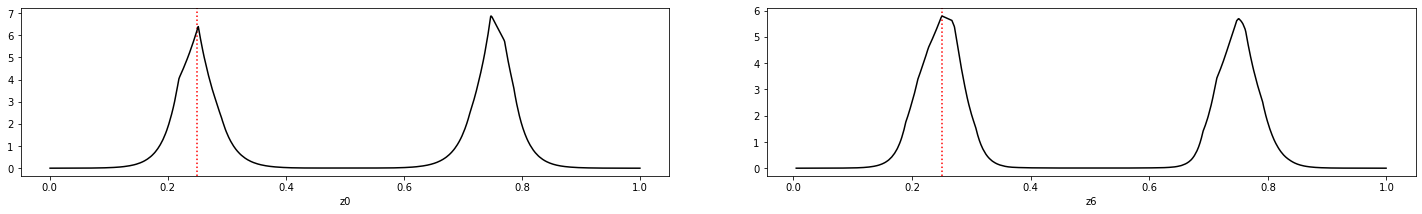

In [9]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (25, 3), ncol = 2, params = [0, 6])

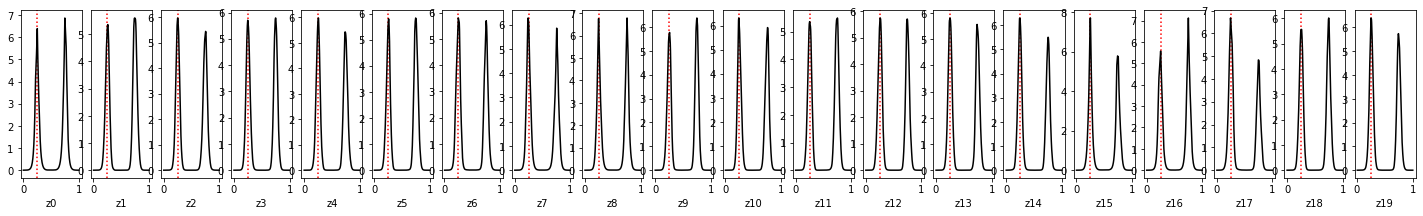

In [10]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (25, 3))

In [11]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

yshape (shape of features between head and legs): 8
Start training
LR iteration 0
Validation loss: 5.541050434112549
Validation loss: 5.373060703277588
Validation loss: 4.8125104904174805
Validation loss: 4.316718101501465
Validation loss: 4.009800314903259
Validation loss: 3.9678298234939575
Validation loss: 3.6895854473114014
Validation loss: 3.264302611351013
Validation loss: 3.019152879714966
Validation loss: 3.125273108482361
Total epochs: 10
LR iteration 1
Validation loss: 3.0560063123703003
Validation loss: 2.5898661613464355
Validation loss: 2.8175830841064453
Total epochs: 3
LR iteration 2
Validation loss: 2.7225914001464844
Validation loss: 2.656590700149536
Validation loss: 2.5048218965530396
Validation loss: 2.8014116287231445
Total epochs: 4


ValueError: [0, 2] is not in list

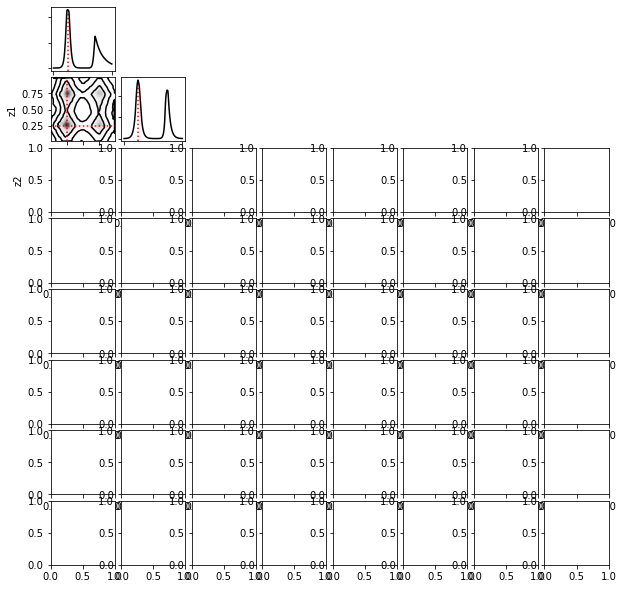

In [12]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10)

In [ ]:
re2 = swyft.RatioEstimation(zdim, td, device = DEVICE, combinations = swyft.get_2d_combinations([0, 1]), head = Head)
re2.train(max_epochs = MAX_EPOCHS, nbatch = 32, early_stopping_patience = 3, lr_schedule = [1e-3, 5e-4])

In [ ]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 15, Nmax = 10000)

In [ ]:
ds = td.get_dataset()
zs = np.array([d['z'].numpy() for d in ds])
plt.scatter(zs[:,0], zs[:,1])